# Spark Funds Investment Analysis


In [2]:
#import the libraries
import pandas as pd
import numpy as np

In [3]:
#read the dataset and check the first five rows
companies = pd.read_csv("E:/Financial AnalysisCV/Investment-Analysis/Investment-Analysis/Investment-Analysis/Dataset/companies.csv",encoding= 'unicode_escape')
rounds2 = pd.read_csv("E:/Financial AnalysisCV/Investment-Analysis/Investment-Analysis/Investment-Analysis/Dataset/rounds2.csv",encoding= 'unicode_escape')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2024,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2024,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2024,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
#change company_permalink and permalink to uppercase
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.upper())
companies['permalink'] = companies['permalink'].apply(lambda x: x.upper())

In [9]:
# unique companies are present in rounds2
len(rounds2['company_permalink'].unique())

66373

In [10]:
# unique companies are present in companies
len(companies['permalink'].value_counts())

66368

In [11]:
#Merge two dataframe on inner join.
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='inner')

In [12]:
#datatypes of all the columns of the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114900 entries, 0 to 114899
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114900 non-null  object 
 1   funding_round_permalink  114900 non-null  object 
 2   funding_round_type       114900 non-null  object 
 3   funding_round_code       31134 non-null   object 
 4   funded_at                114900 non-null  object 
 5   raised_amount_usd        94930 non-null   float64
 6   permalink                114900 non-null  object 
 7   name                     114899 non-null  object 
 8   homepage_url             108771 non-null  object 
 9   category_list            111506 non-null  object 
 10  status                   114900 non-null  object 
 11  country_code             106250 non-null  object 
 12  state_code               103983 non-null  object 
 13  region                   104761 non-null  object 
 14  city

In [13]:
master_frame.shape

(114900, 16)

In [14]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2024,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2024,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2024,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Data cleaning of master_frame.

In [15]:
# Missing value percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.53
state_code                  9.50
region                      8.82
city                        8.82
founded_at                 17.84
dtype: float64

In [16]:
#dropping column that are not needed during analysis
master_frame = master_frame.drop('permalink', axis=1)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [17]:
# Remove the company where country code is not entered.
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [18]:
master_frame['raised_amount_usd'].describe()

count    8.909300e+04
mean     1.047209e+07
std      1.114700e+08
min      0.000000e+00
25%      3.700000e+05
50%      1.800000e+06
75%      7.114147e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [19]:
# Remove the company for which raised_amound_usd is  0.
master_frame = master_frame[~(master_frame['raised_amount_usd'] == 0)]

In [20]:
# Remove the company where categorylist is not entered.
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104152 entries, 0 to 114899
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        104152 non-null  object 
 1   funding_round_permalink  104152 non-null  object 
 2   funding_round_type       104152 non-null  object 
 3   funded_at                104152 non-null  object 
 4   raised_amount_usd        88152 non-null   float64
 5   name                     104151 non-null  object 
 6   category_list            104152 non-null  object 
 7   status                   104152 non-null  object 
 8   country_code             104152 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.9+ MB


#  Funding Type Analysis

In [22]:
#import the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [23]:
#most common value in the Funding round type
master_frame.funding_round_type.value_counts()

funding_round_type
venture                  51996
seed                     26358
debt_financing            6679
angel                     5390
undisclosed               3946
equity_crowdfunding       2795
private_equity            2054
grant                     1998
convertible_note          1609
post_ipo_equity            608
product_crowdfunding       348
post_ipo_debt              151
non_equity_assistance      133
secondary_market            87
Name: count, dtype: int64

In [24]:
#filter the data with funding type.
funding_types = ['venture','angel','seed','private_equity']
master_frame = master_frame[master_frame['funding_round_type'].isin(funding_types)]

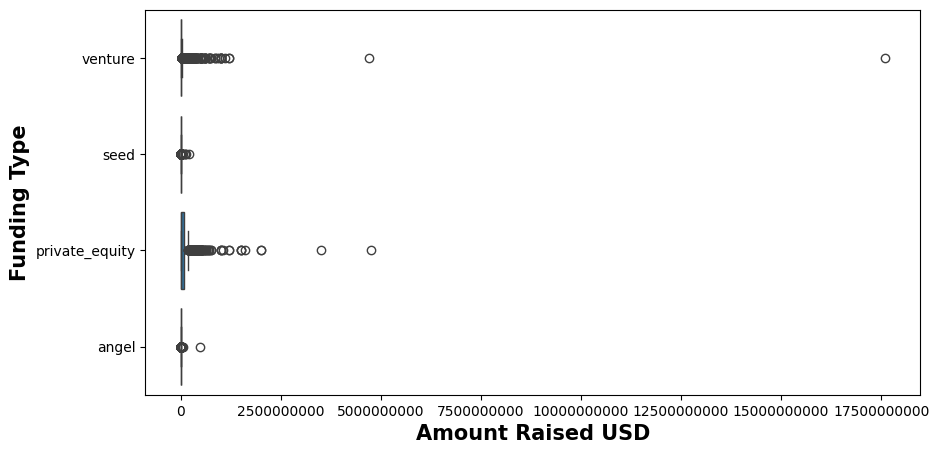

In [25]:
#Box plot for Funding type agaist Raised amount
#plt.figure(figsize=[10,5])
#sns.boxplot(master_frame['raised_amount_usd'], master_frame.funding_round_type)
#plt.xlabel("Amount Raised USD",fontweight ='bold',fontsize = 15)
#plt.ylabel("Funding Type",fontweight ='bold',fontsize = 15)
#plt.ticklabel_format(style='plain', axis='x')
#plt.show()


plt.figure(figsize=[10, 5])
sns.boxplot(x='raised_amount_usd', y='funding_round_type', data=master_frame)
plt.xlabel("Amount Raised USD", fontweight='bold', fontsize=15)
plt.ylabel("Funding Type", fontweight='bold', fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [26]:
#From boxplot we can consider there are lots of outliner, so best representative amount should be median value of Funding type.
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               425000.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

In [27]:
#plot_1 shows the representative amount of investment in each funding type.
#This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
plot_1 = master_frame

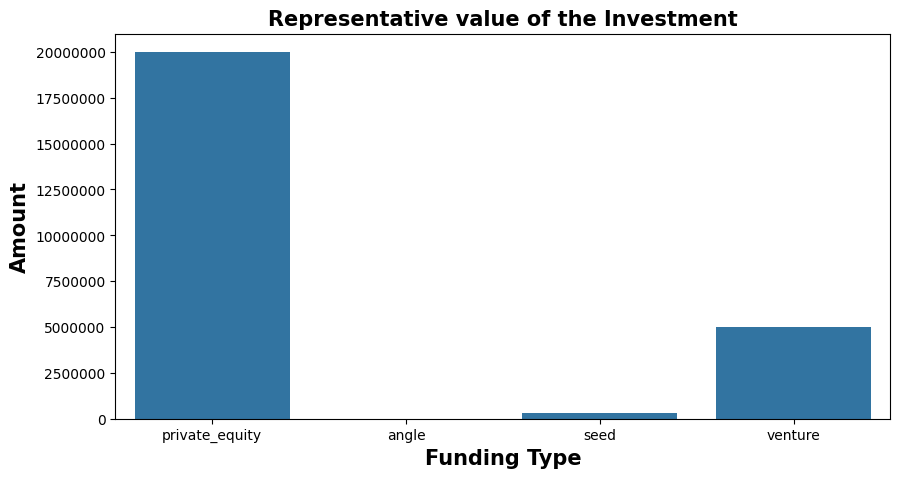

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_1, x="funding_round_type", y="raised_amount_usd", estimator=np.median,order=["private_equity","angle","seed","venture"], ci=0)
plt.title("Representative value of the Investment",fontweight ='bold',fontsize = 15)
plt.xlabel("Funding Type",fontweight ='bold',fontsize = 15)
plt.ylabel("Amount",fontweight ='bold',fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


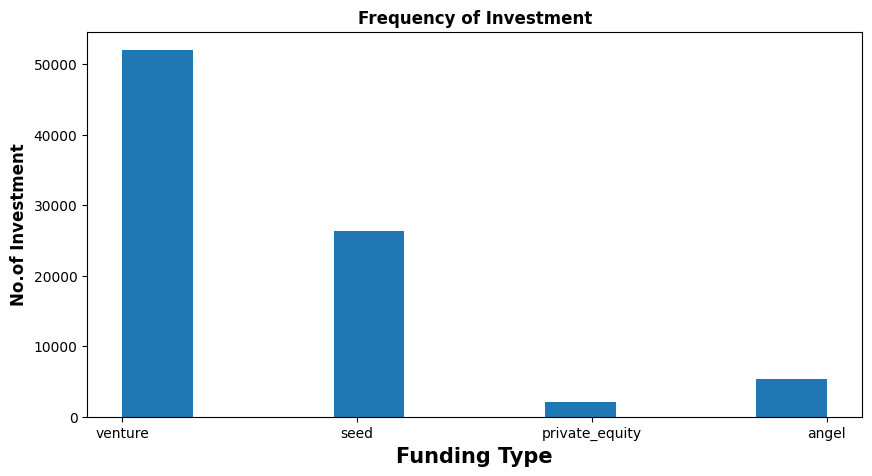

In [29]:
plt.figure(figsize=(10,5))
plt.hist(master_frame['funding_round_type'])
plt.title("Frequency of Investment",fontweight ='bold',fontsize = 12)
plt.xlabel("Funding Type",fontweight ='bold',fontsize = 15)
plt.ylabel("No.of Investment",fontweight ='bold',fontsize = 12)
plt.show()

In [30]:
#dataset with venture as investment type.
master_frame = master_frame[master_frame['funding_round_type'] == "venture"]

In [31]:
master_frame.shape

(51996, 9)

# Country Analysis

In [32]:
#top nine countries which have received the highest total funding
top9_countries=master_frame.groupby('country_code')['raised_amount_usd'].sum().nlargest(9)

In [33]:
top9_countries

country_code
USA    4.200706e+11
CHN    3.933892e+10
GBR    2.007310e+10
IND    1.426151e+10
CAN    9.482234e+09
FRA    7.208755e+09
ISR    6.854350e+09
DEU    6.305522e+09
JPN    3.167649e+09
Name: raised_amount_usd, dtype: float64

In [34]:
# plot_2 shows the top 9 countries against the total amount of investments of funding type "Venture".
plot_2 = top9_countries

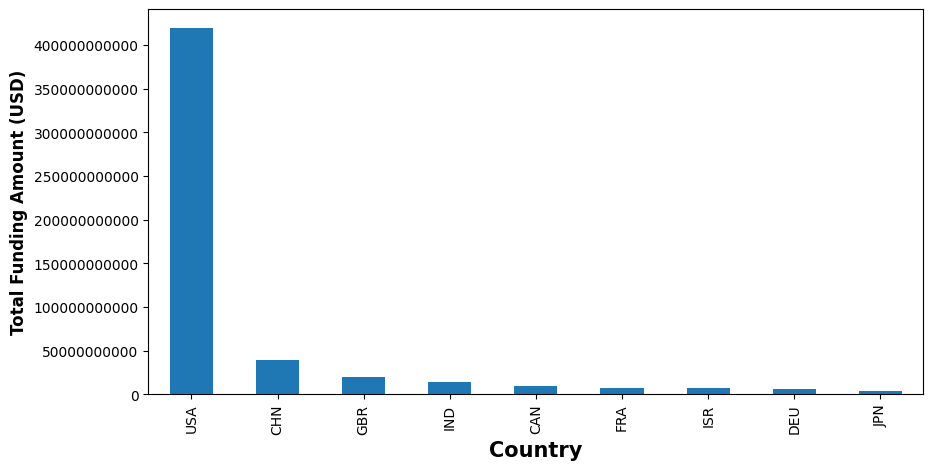

In [35]:
plt.figure(figsize=(10,5))
plot_2.plot(kind='bar')
plt.xlabel("Country",fontweight ='bold',fontsize = 15)
plt.ylabel("Total Funding Amount (USD)",fontweight ='bold',fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')

In [36]:
#filter the data with top 9 countries.
countries =['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
top9 = master_frame[master_frame['country_code'].isin(countries)]

In [37]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47591 entries, 0 to 114894
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        47591 non-null  object 
 1   funding_round_permalink  47591 non-null  object 
 2   funding_round_type       47591 non-null  object 
 3   funded_at                47591 non-null  object 
 4   raised_amount_usd        44095 non-null  float64
 5   name                     47591 non-null  object 
 6   category_list            47591 non-null  object 
 7   status                   47591 non-null  object 
 8   country_code             47591 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.6+ MB


#  Sector Analysis

In [38]:
# create Primary sector of each company
top9['primary_sector'] = top9['category_list'].str.split('|').str[0]

In [39]:
top9['primary_sector'].value_counts()

primary_sector
Biotechnology          6597
Software               4062
Advertising            2210
Health Care            1804
Enterprise Software    1773
                       ... 
Solar                     1
Natural Resources         1
Shopping                  1
Gift Registries           1
Task Management           1
Name: count, Length: 604, dtype: int64

In [40]:
#read the mapping file.
mapping = pd.read_csv('E:/Financial AnalysisCV/Investment-Analysis/Investment-Analysis/Investment-Analysis/Dataset/mapping.csv')


In [41]:
#At many places in the category_list column the 'na' is misprinded as '0'
#Eg. 'Analysis' is present as 'A0lysis
mapping.category_list = mapping.category_list.replace({'0':'na'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [42]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [43]:
# Map each primary sector to one of the eight main sectors
top9['main_sector']= top9['primary_sector'].map(mapping.set_index('category_list')['main_sector'])

In [44]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2024,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms,"News, Search and Messaging"
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,Curated Web,"News, Search and Messaging"
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2024,NaN,004 Technologies,Software,operating,USA,Software,Others
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology,Cleantech / Semiconductors


#  Sector Analysis  with respect to Country

In [45]:
# Remove company which don't have main sector
top9 = top9[~(top9['main_sector'].isnull())]

In [46]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47406 entries, 0 to 114894
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        47406 non-null  object 
 1   funding_round_permalink  47406 non-null  object 
 2   funding_round_type       47406 non-null  object 
 3   funded_at                47406 non-null  object 
 4   raised_amount_usd        43921 non-null  float64
 5   name                     47406 non-null  object 
 6   category_list            47406 non-null  object 
 7   status                   47406 non-null  object 
 8   country_code             47406 non-null  object 
 9   primary_sector           47406 non-null  object 
 10  main_sector              47406 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.3+ MB


## USA

In [47]:
#filter the data with country USA.
D1=top9[top9['country_code']=='USA']

In [48]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [49]:
D1['raised_amount_usd'].sum()

np.float64(107318450966.0)

In [50]:
D1['raised_amount_usd'].count()

np.int64(12012)

In [51]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [52]:
D1_topSector=D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [53]:
D1_topSector

main_sector
Others                                     2.632105e+10
Social, Finance, Analytics, Advertising    2.380740e+10
Cleantech / Semiconductors                 2.120667e+10
News, Search and Messaging                 1.395960e+10
Health                                     8.211860e+09
Manufacturing                              7.258570e+09
Entertainment                              5.099198e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

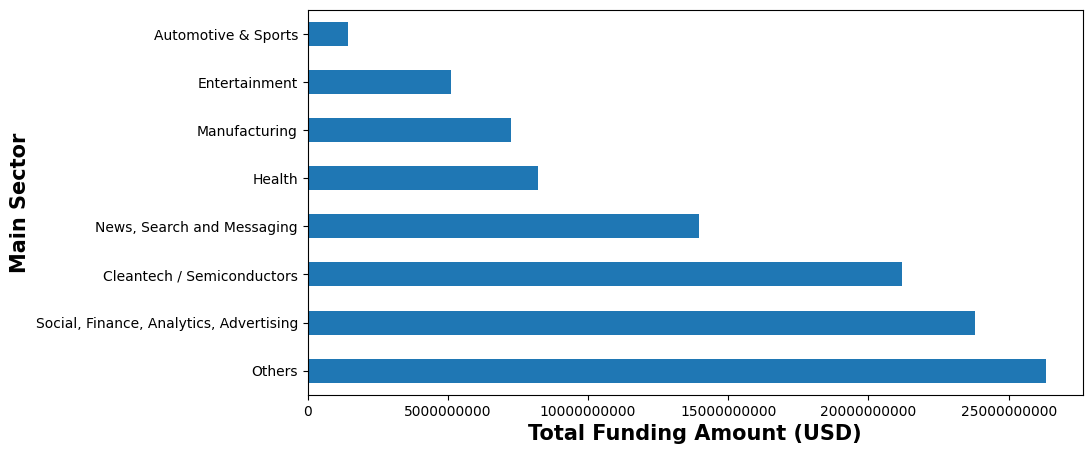

In [54]:
plt.figure(figsize=(10,5))
D1_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [55]:
# company received the highest investment in "Others" sector
D1[D1['main_sector']=='Others'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/VIRTUSTREAM            64300000.0
/ORGANIZATION/CAPELLA                54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS      54201907.0
/ORGANIZATION/DECARTA                52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE    51000000.0
Name: raised_amount_usd, dtype: float64

In [56]:
# company received the highest investment in "Cleantech / Semiconductors" sector
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/SHOTSPOTTER    67933006.0
/ORGANIZATION/DEMANDBASE     63000000.0
/ORGANIZATION/INTACCT        61800000.0
/ORGANIZATION/NETBASE        60600000.0
/ORGANIZATION/LOTAME         59700000.0
Name: raised_amount_usd, dtype: float64

## GBR

In [57]:
#filter the data with country GBR.
D2=top9[top9['country_code']=='GBR']

In [58]:
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

In [59]:
D2['raised_amount_usd'].sum()

np.float64(5365230110.0)

In [60]:
D2['raised_amount_usd'].count()

np.int64(619)

In [61]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [62]:
D2_topSector = D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [63]:
D2_topSector

main_sector
Others                                     1.283626e+09
Cleantech / Semiconductors                 1.150140e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

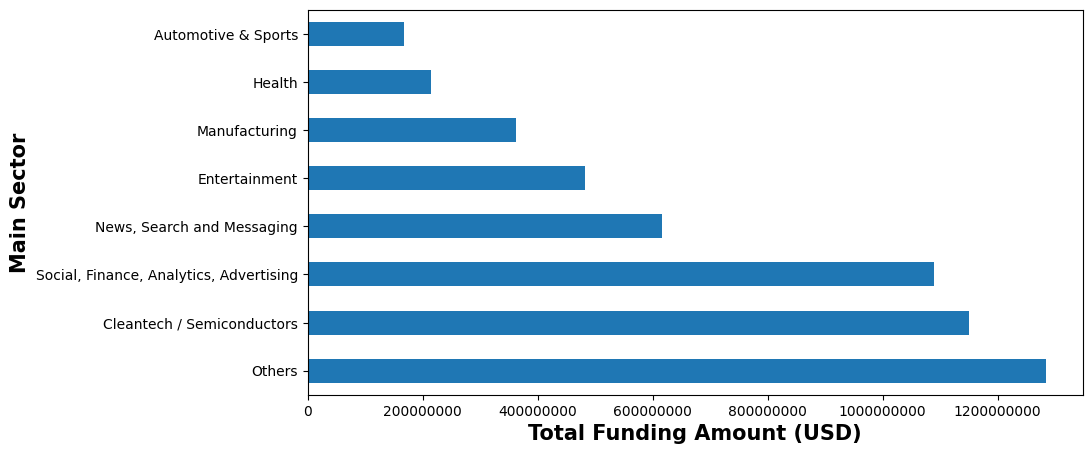

In [64]:
plt.figure(figsize=(10,5))
D2_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [65]:
# company received the highest investment in "Others" sector
D2[D2['main_sector']=='Others'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/ENIGMATIC                  32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
Name: raised_amount_usd, dtype: float64

In [66]:
# company received the highest investment in "Cleantech / Semiconductors" sector
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/CELLTICK-TECHNOLOGIES    37500000.0
/ORGANIZATION/MYTHINGS                 34000000.0
/ORGANIZATION/ZOPA                     32900000.0
/ORGANIZATION/IMAGINI                  28550000.0
/ORGANIZATION/MARKETINVOICE            25553007.0
Name: raised_amount_usd, dtype: float64

## IND

In [67]:
#filter the data with country IND.
D3=top9[top9['country_code']=='IND']

In [68]:
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

In [69]:
D3['raised_amount_usd'].sum()

np.float64(2949543602.0)

In [70]:
D3['raised_amount_usd'].count()

np.int64(328)

In [71]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [72]:
D3_topSector = D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)

In [73]:
D3_topSector

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

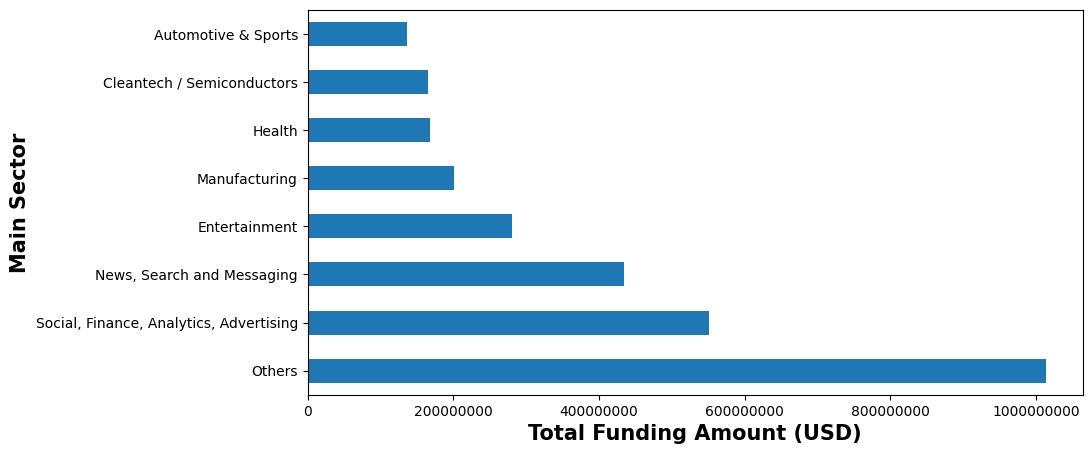

In [74]:
plt.figure(figsize=(10,5))
D3_topSector.plot(kind='barh')
plt.xlabel("Total Funding Amount (USD)", fontweight ='bold',fontsize = 15)
plt.ylabel("Main Sector", fontweight ='bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [75]:
# company received the highest investment in "Others" sector
D3[D3['main_sector']=='Others'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/FIRSTCRY-COM        39000000.0
/ORGANIZATION/MYNTRA              38000000.0
/ORGANIZATION/COMMONFLOOR         32900000.0
/ORGANIZATION/PEPPERFRY-COM       28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD    25000000.0
Name: raised_amount_usd, dtype: float64

In [76]:
# company received the highest investment in "News, Search and Messaging" sector
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink']).raised_amount_usd.sum().nlargest(5)

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS               50700000.0
/ORGANIZATION/KOMLI-MEDIA                   28000000.0
/ORGANIZATION/SHOPCLUES-COM                 25000000.0
/ORGANIZATION/INTARVO                       21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES    21556050.0
Name: raised_amount_usd, dtype: float64

#  Plots

In [77]:
# A plot showing the representative amount of investment in each funding type.
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

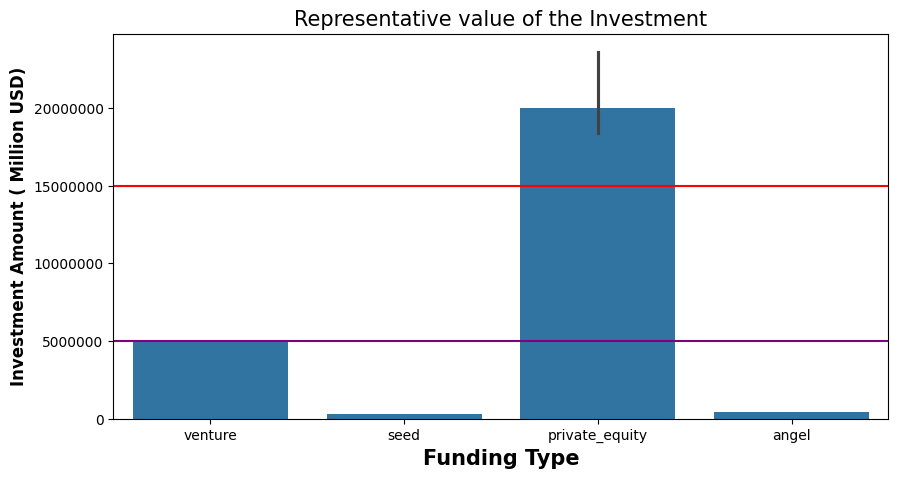

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(data=plot_1, x="funding_round_type", y="raised_amount_usd", estimator=np.median)
plt.title("Representative value of the Investment", fontsize = 15)
plt.xlabel("Funding Type", fontweight ='bold',fontsize = 15)
plt.ylabel("Investment Amount ( Million USD)",fontweight ='bold',fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.axhline(5000000, color='purple')
plt.axhline(15000000, color='red')
plt.show()

In [79]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

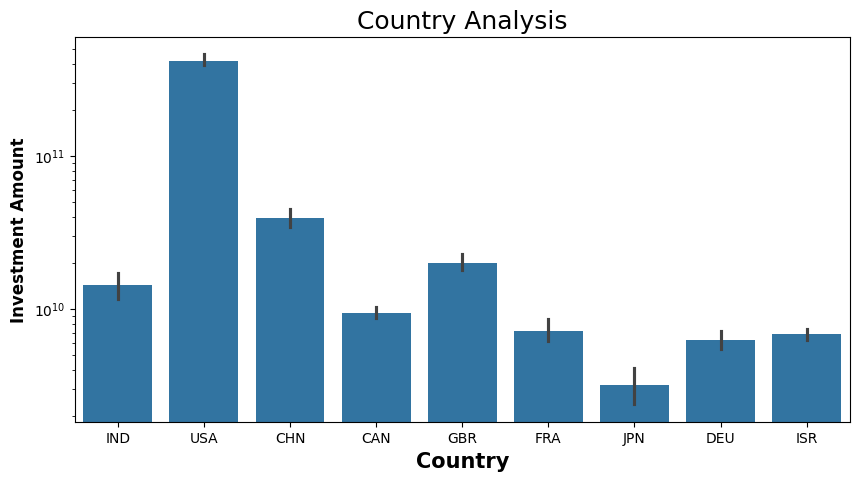

In [80]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
c.set_yscale('log')
c.set_title('Country Analysis',fontsize =18)
plt.xlabel("Country", fontweight ='bold',fontsize = 15)
plt.ylabel("Investment Amount",fontweight ='bold',fontsize = 12)
plt.show()


In [81]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart.
#This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [82]:
D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

In [83]:
#master_dataframe=D1[D1['main_sector'].
#                               isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
#extract top3 sector from USA
vd1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [84]:
#master_dataframe=master_dataframe.append(D2[D2['main_sector'].
#                              isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])])
#extract top3 sector from GBR
vd2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [85]:
#master_dataframe=master_dataframe.append(D3[D3['main_sector'].
#                              isin(['Others','News, Search and Messaging','Social, Finance, Analytics, Advertising'])])


#extract top3 sector from IND
vd3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

In [86]:
#master_dataframe.head()
master_dataframe=pd.concat([vd1,vd2,vd3])

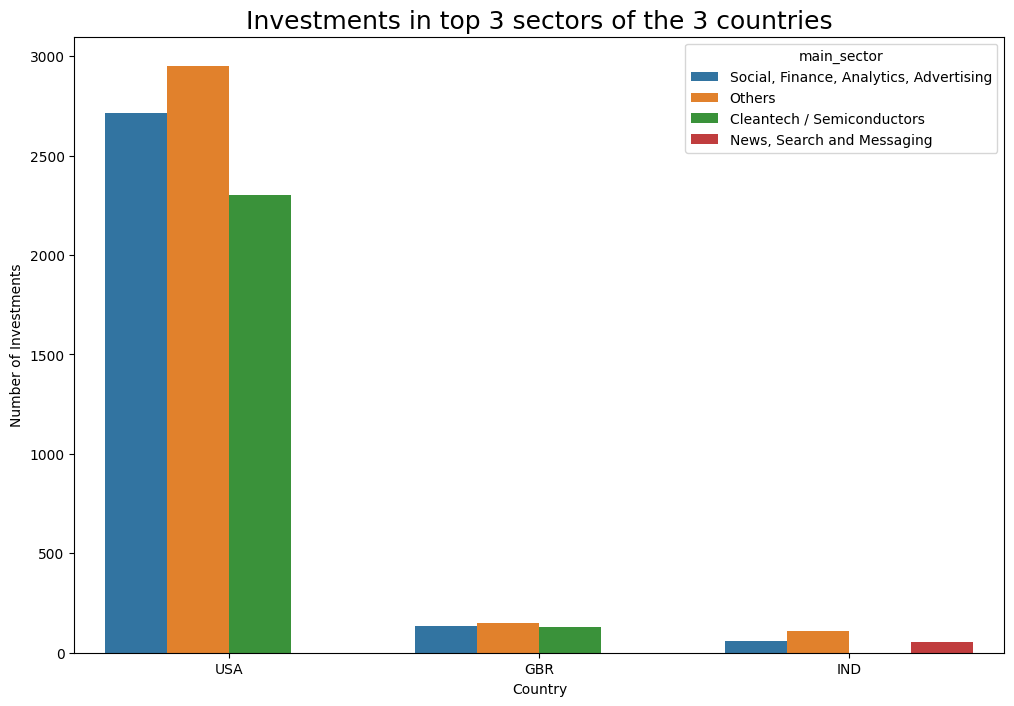

In [87]:
plt.figure(figsize=(12, 8))
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_dataframe, estimator=lambda x:len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top 3 sectors of the 3 countries',fontsize =18)
plt.show()


In [90]:
# Feature Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for prediction
# Encoding categorical features
le_funding = LabelEncoder()
le_country = LabelEncoder()
le_sector = LabelEncoder()

master_dataframe['funding_round_type_encoded'] = le_funding.fit_transform(master_dataframe['funding_round_type'])
master_dataframe['country_code_encoded'] = le_country.fit_transform(master_dataframe['country_code'])
master_dataframe['main_sector_encoded'] = le_sector.fit_transform(master_dataframe['main_sector'])

# Define features and target
features = master_dataframe[['funding_round_type_encoded', 'country_code_encoded', 'main_sector_encoded', 'raised_amount_usd']]
target = (master_dataframe['raised_amount_usd'] >= 5000000) & (master_dataframe['raised_amount_usd'] <= 15000000)  # Target is whether the funding falls within the ideal range
target = target.astype(int)  # Convert to binary

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predicting for a new sample
new_sample = {
    "funding_round_type": "venture",
    "country_code": "USA",
    "main_sector": "Others",
    "raised_amount_usd": 10000000
}

# Encode new sample
new_sample_encoded = [
    le_funding.transform([new_sample["funding_round_type"]])[0],
    le_country.transform([new_sample["country_code"]])[0],
    le_sector.transform([new_sample["main_sector"]])[0],
    new_sample["raised_amount_usd"]
]

# Make prediction
prediction = model.predict([new_sample_encoded])
print("\nPrediction for the new sample:", "Likely to receive funding" if prediction[0] == 1 else "Unlikely to receive funding")


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1719

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


Prediction for the new sample: Likely to receive funding



Root Mean Squared Error (RMSE): 0.1433006941145156

Predicted funding for the next period: 1545754946.0269446


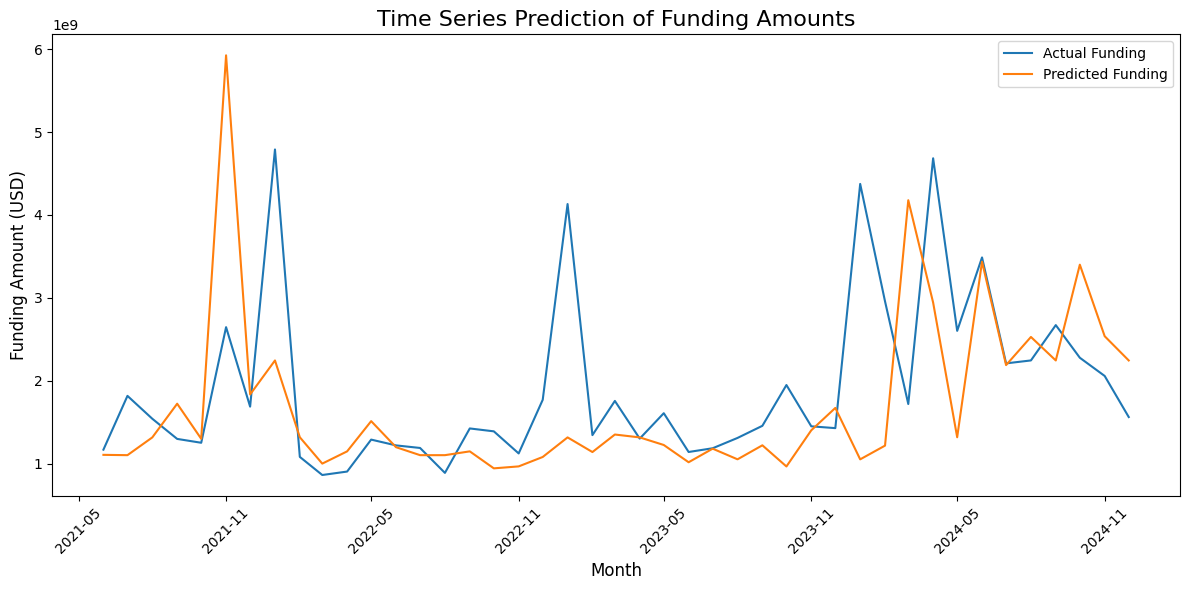

In [91]:
# Time Series Analysis for Feature Prediction
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

# Prepare data for time series prediction
master_frame['funded_date'] = pd.to_datetime(master_frame['funded_at'], errors='coerce')  # Convert funded_at to datetime
time_series_data = master_frame.dropna(subset=['funded_date', 'raised_amount_usd'])  # Drop rows with missing dates or funding
time_series_data = time_series_data.sort_values('funded_date')  # Sort by date

# Aggregate funding amounts by month
time_series_data['month'] = time_series_data['funded_date'].dt.to_period('M')
monthly_funding = time_series_data.groupby('month')['raised_amount_usd'].sum().reset_index()
monthly_funding['month'] = monthly_funding['month'].dt.to_timestamp()

# Scale data for the model
scaler = MinMaxScaler()
monthly_funding['scaled_funding'] = scaler.fit_transform(monthly_funding[['raised_amount_usd']])

# Prepare features and target for time series prediction
monthly_funding['lag_1'] = monthly_funding['scaled_funding'].shift(1)  # Add lag features
monthly_funding['lag_2'] = monthly_funding['scaled_funding'].shift(2)
monthly_funding = monthly_funding.dropna()

X = monthly_funding[['lag_1', 'lag_2']].values
y = monthly_funding['scaled_funding'].values

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRoot Mean Squared Error (RMSE):", rmse)

# Predict future funding trends
future_lag_1 = y[-1]
future_lag_2 = y[-2]
future_scaled_funding = gb_model.predict([[future_lag_1, future_lag_2]])[0]
future_funding = scaler.inverse_transform([[future_scaled_funding]])[0][0]
print("\nPredicted funding for the next period:", future_funding)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_funding['month'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Funding')
plt.plot(monthly_funding['month'][-len(y_test):], scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Predicted Funding')
plt.title("Time Series Prediction of Funding Amounts", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Funding Amount (USD)", fontsize=12)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
